APARTADO 2B: CREACIÓN DE VARIABLES DERIVADAS
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado: 300 películas con 20 variables

Creando variables derivadas...

ESTADÍSTICAS DE VARIABLES DERIVADAS

Roi:
Películas con datos: 257
Media: 6.89
Mediana: 3.08
Rango: 0.00 - 75.93

Porcentaje Domestico:
Películas con datos: 270
Media: 86.82
Mediana: 99.96
Rango: 0.33 - 100.00

Multiplicador Taquilla:
Películas con datos: 244
Media: inf
Mediana: 12.13
Rango: 1.79 - inf

Diferencia Puntuaciones:
Películas con datos: 299
Media: 0.54
Mediana: 0.50
Rango: 0.00 - 1.90

Puntuacion Promedio:
Películas con datos: 299
Media: 6.89
Mediana: 6.95
Rango: 3.65 - 8.40

Duracion Minutos:
Películas con datos: 300
Media: 111.51
Mediana: 107.50
Rango: 69.00 - 225.00

Éxito Comercial:
  Éxito: 166 películas (64.6%)
  No éxito: 91 películas (35.4%)

Origen geográfico:
  USA: 210 películas (70.0%)
  No-USA: 90 películas (30

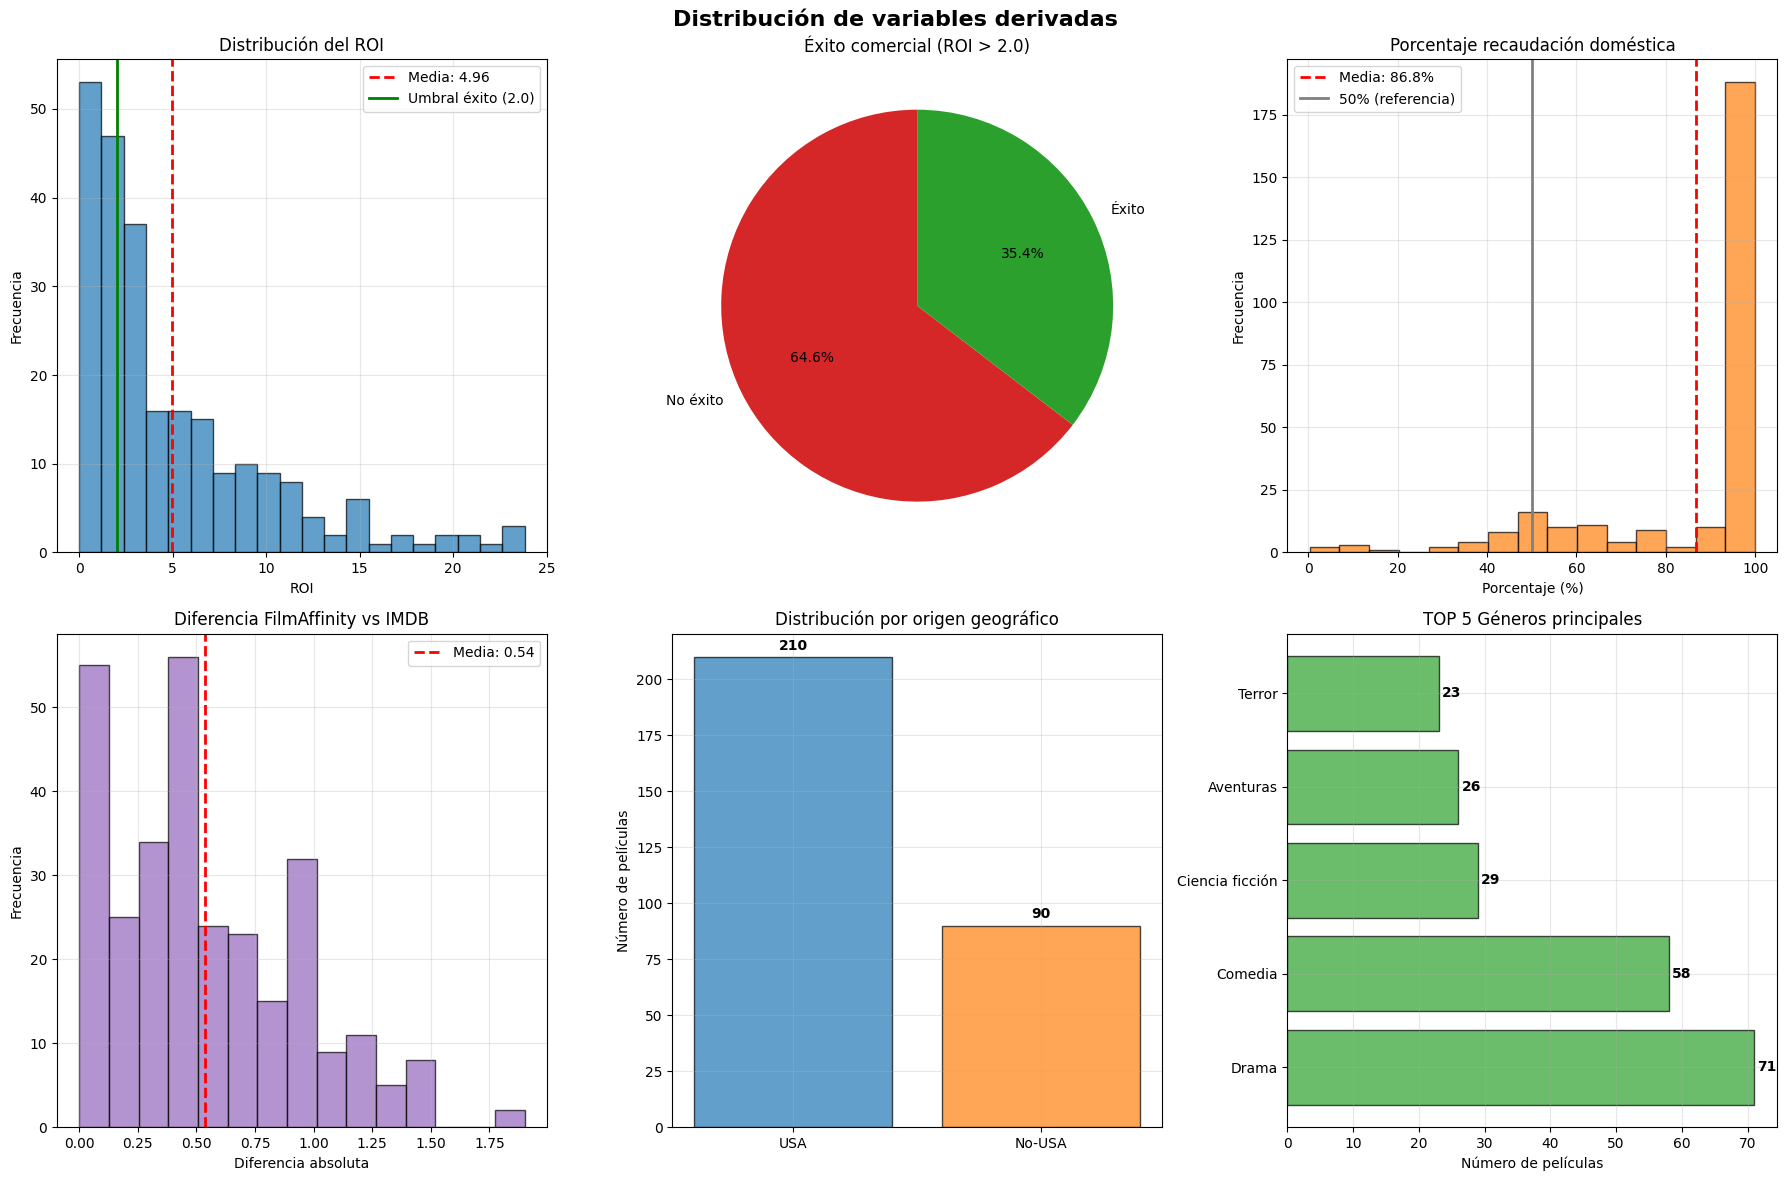


TOP 10 PELÍCULAS POR ROI
 1. E.T.: The Extra-Terrestrial (1982) - ROI: 75.93
 2. Friday the 13th (1980) - ROI: 72.58
 3. Friday the 13th, Part 2 (1981) - ROI: 72.58
 4. The Breakfast Club (1985) - ROI: 51.53
 5. Porky's (1981) - ROI: 44.52
 6. Look Who's Talking (1989) - ROI: 39.60
 7. Crocodile Dundee (1986) - ROI: 37.30
 8. Dirty Dancing (1987) - ROI: 35.76
 9. Star Wars. Episode V: The Empire Strikes Back (1980) - ROI: 30.56
10. Stranger than Paradise (1984) - ROI: 27.22

Variables derivadas creadas (10):
roi: 257 valores (85.7%)
exito_comercial: 257 valores (85.7%)
porcentaje_domestico: 270 valores (90.0%)
multiplicador_taquilla: 244 valores (81.3%)
puntuacion_imdb_num: 299 valores (99.7%)
diferencia_puntuaciones: 299 valores (99.7%)
puntuacion_promedio: 299 valores (99.7%)
es_usa: 300 valores (100.0%)
genero_principal: 300 valores (100.0%)
duracion_minutos: 300 valores (100.0%)


In [3]:
# ============================================================================
# APARTADO 2B: CREACIÓN DE VARIABLES DERIVADAS
# A partir del dataset integrado del apartado 2a
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*70)
print("APARTADO 2B: CREACIÓN DE VARIABLES DERIVADAS")
print("="*70)

# ============================================================================
# CARGA DEL DATASET
# ============================================================================

# Montar Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Cargar dataset integrado
df = pd.read_csv("/content/drive/MyDrive/Tipología/PR2/datasets/paso02a-peliculas_filmaffinity_1980-1989_imdb_integracion.csv",
                 sep=';', encoding='utf-8')

print(f"Dataset cargado: {len(df)} películas con {len(df.columns)} variables")

# ============================================================================
# CREACIÓN DE VARIABLES DERIVADAS
# ============================================================================

print("\nCreando variables derivadas...")

# Convertir variables financieras a formato numérico
df['presupuesto_millones'] = pd.to_numeric(df['presupuesto_millones'], errors='coerce')
df['recaudacion_domestica_millones'] = pd.to_numeric(df['recaudacion_domestica_millones'], errors='coerce')
df['recaudacion_mundial_millones'] = pd.to_numeric(df['recaudacion_mundial_millones'], errors='coerce')
df['estreno_millones'] = pd.to_numeric(df['estreno_millones'], errors='coerce')

# 1. ROI (Return on Investment)
df['roi'] = df['recaudacion_mundial_millones'] / df['presupuesto_millones']

# 2. Éxito comercial (ROI > 2.0)
df['exito_comercial'] = (df['roi'] > 2.0).astype(int)
df['exito_comercial'] = df['exito_comercial'].where(df['roi'].notna(), None)

# 3. Porcentaje de recaudación doméstica
df['porcentaje_domestico'] = (df['recaudacion_domestica_millones'] /
                              df['recaudacion_mundial_millones']) * 100

# 4. Multiplicador de taquilla (recaudación total vs fin de semana estreno)
df['multiplicador_taquilla'] = (df['recaudacion_mundial_millones'] /
                                df['estreno_millones'])

# 5. Puntuación IMDB numérica
df['puntuacion_imdb_num'] = pd.to_numeric(df['imdb_puntuacion'], errors='coerce')

# 6. Diferencia entre puntuaciones FilmAffinity vs IMDB
df['diferencia_puntuaciones'] = abs(df['puntuacion_imdb_num'] - df['puntuacion'])

# 7. Puntuación promedio entre plataformas
df['puntuacion_promedio'] = (df['puntuacion'] + df['puntuacion_imdb_num']) / 2

# 8. Origen USA (variable binaria)
df['es_usa'] = df['pais'].str.contains('Estados Unidos', case=False, na=False).astype(int)

# 9. Género principal (primer género de la lista)
df['genero_principal'] = df['genero'].str.split(',').str[0].str.strip()

# 10. Duración en minutos (extraer número de "146 min.")
df['duracion_minutos'] = df['duracion'].str.extract('(\d+)').astype(float)

# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("\n" + "="*50)
print("ESTADÍSTICAS DE VARIABLES DERIVADAS")
print("="*50)

variables_numericas = ['roi', 'porcentaje_domestico', 'multiplicador_taquilla',
                      'diferencia_puntuaciones', 'puntuacion_promedio', 'duracion_minutos']

for var in variables_numericas:
    datos = df[var].dropna()
    if len(datos) > 0:
        print(f"\n{var.replace('_', ' ').title()}:")
        print(f"Películas con datos: {len(datos)}")
        print(f"Media: {datos.mean():.2f}")
        print(f"Mediana: {datos.median():.2f}")
        print(f"Rango: {datos.min():.2f} - {datos.max():.2f}")

# Estadísticas categóricas
print(f"\nÉxito Comercial:")
exitos = df['exito_comercial'].value_counts()
for valor, count in exitos.items():
    etiqueta = "Éxito" if valor == 1 else "No éxito"
    porcentaje = (count / exitos.sum()) * 100
    print(f"  {etiqueta}: {count} películas ({porcentaje:.1f}%)")

print(f"\nOrigen geográfico:")
usa_count = df['es_usa'].sum()
no_usa_count = len(df) - usa_count
print(f"  USA: {usa_count} películas ({usa_count/len(df)*100:.1f}%)")
print(f"  No-USA: {no_usa_count} películas ({no_usa_count/len(df)*100:.1f}%)")

print(f"\nTOP 5 géneros principales:")
top_generos = df['genero_principal'].value_counts().head()
for genero, count in top_generos.items():
    porcentaje = (count / len(df)) * 100
    print(f"  {genero}: {count} películas ({porcentaje:.1f}%)")

# ============================================================================
# VISUALIZACIONES
# ============================================================================

print(f"\n" + "="*50)
print("GENERANDO VISUALIZACIONES")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribución de variables derivadas', fontsize=16, fontweight='bold')

# ROI
roi_data = df['roi'].dropna()
roi_plot = roi_data[roi_data <= roi_data.quantile(0.95)]  # Filtrar outliers extremos
axes[0,0].hist(roi_plot, bins=20, alpha=0.7, color='#1f77b4', edgecolor='black')
axes[0,0].axvline(roi_plot.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {roi_plot.mean():.2f}')
axes[0,0].axvline(2.0, color='green', linestyle='-', linewidth=2, label='Umbral éxito (2.0)')
axes[0,0].set_title('Distribución del ROI')
axes[0,0].set_xlabel('ROI')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Éxito comercial
exito_data = df['exito_comercial'].value_counts()
labels = ['No éxito', 'Éxito']
colors = ['#d62728', '#2ca02c']
axes[0,1].pie(exito_data.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,1].set_title('Éxito comercial (ROI > 2.0)')

# Porcentaje doméstico
domestico_data = df['porcentaje_domestico'].dropna()
axes[0,2].hist(domestico_data, bins=15, alpha=0.7, color='#ff7f0e', edgecolor='black')
axes[0,2].axvline(domestico_data.mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {domestico_data.mean():.1f}%')
axes[0,2].axvline(50, color='gray', linestyle='-', linewidth=2, label='50% (referencia)')
axes[0,2].set_title('Porcentaje recaudación doméstica')
axes[0,2].set_xlabel('Porcentaje (%)')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Diferencia puntuaciones
diff_data = df['diferencia_puntuaciones'].dropna()
axes[1,0].hist(diff_data, bins=15, alpha=0.7, color='#9467bd', edgecolor='black')
axes[1,0].axvline(diff_data.mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {diff_data.mean():.2f}')
axes[1,0].set_title('Diferencia FilmAffinity vs IMDB')
axes[1,0].set_xlabel('Diferencia absoluta')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Origen geográfico
origen_data = ['USA', 'No-USA']
origen_counts = [df['es_usa'].sum(), len(df) - df['es_usa'].sum()]
axes[1,1].bar(origen_data, origen_counts, color=['#1f77b4', '#ff7f0e'], alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribución por origen geográfico')
axes[1,1].set_ylabel('Número de películas')
axes[1,1].grid(True, alpha=0.3)
for i, v in enumerate(origen_counts):
    axes[1,1].text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# TOP 5 géneros
top_5_generos = df['genero_principal'].value_counts().head()
axes[1,2].barh(range(len(top_5_generos)), top_5_generos.values,
               color='#2ca02c', alpha=0.7, edgecolor='black')
axes[1,2].set_yticks(range(len(top_5_generos)))
axes[1,2].set_yticklabels(top_5_generos.index)
axes[1,2].set_title('TOP 5 Géneros principales')
axes[1,2].set_xlabel('Número de películas')
axes[1,2].grid(True, alpha=0.3)
for i, v in enumerate(top_5_generos.values):
    axes[1,2].text(v + 0.5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# TOP PELÍCULAS POR ROI
# ============================================================================

print(f"\n" + "="*50)
print("TOP 10 PELÍCULAS POR ROI")
print("="*50)

top_roi = df[df['roi'].notna()].nlargest(10, 'roi')
for i, (_, pelicula) in enumerate(top_roi.iterrows(), 1):
    print(f"{i:2d}. {pelicula['titulo_original']} ({pelicula['anio']}) - ROI: {pelicula['roi']:.2f}")

# ============================================================================
# GUARDADO DEL DATASET FINAL
# ============================================================================

archivo_salida = "/content/drive/MyDrive/Tipología/PR2/datasets/paso02b-peliculas_filmaffinity_1980-1989_imdb_derivadas.csv"
df.to_csv(archivo_salida, sep=';', index=False, encoding='utf-8-sig')

# Variables creadas
variables_nuevas = ['roi', 'exito_comercial', 'porcentaje_domestico', 'multiplicador_taquilla',
                   'puntuacion_imdb_num', 'diferencia_puntuaciones', 'puntuacion_promedio',
                   'es_usa', 'genero_principal', 'duracion_minutos']

print(f"\nVariables derivadas creadas ({len(variables_nuevas)}):")
for var in variables_nuevas:
    disponibles = df[var].count()
    porcentaje = (disponibles / len(df)) * 100
    print(f"{var}: {disponibles} valores ({porcentaje:.1f}%)")

